# Let's play with Madrid accidents data

In this notebook, I'm going to explore the data about traffic accidents in Madrid. 

This data is publicly available here: [link](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
#!conda install -y -c conda-forge pandas-profiling 
import pandas_profiling

## Load and clean the data

First we are going to load the .csv file and parse the date and time to a datetime format:


In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

df = pd.read_excel("data/2019_Accidentalidad.xlsx", parse_dates={'datetime': ['FECHA', 'HORA']}, date_parser=dateparse)
df.shape

(33175, 13)

So, it seems like we have 33175 traffic accidents and 13 features. Let's take a look:

In [4]:
#df.profile_report()
df

,datetime,Nº EXPEDIENTE,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*,* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.
0,2019-01-01 23:30:00,2019S000020,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,NaN
1,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,NaN
2,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0,NaN
3,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0,NaN
4,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33170,2019-08-31 02:00:00,2019S029472,ANTONIO LOPEZ,-,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 45 A 49 AÑOS,Mujer,14.0,NaN
33171,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 18 A 20 AÑOS,Mujer,14.0,NaN
33172,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 50 A 54 AÑOS,Hombre,14.0,NaN
33173,2019-08-31 00:05:00,2019S029152,GLORIETA DEL POZO,-,PUENTE DE VALLECAS,Colisión lateral,Despejado,Turismo,Conductor,DE 55 A 59 AÑOS,Hombre,NaN,NaN


OK, so not exactly. Last column is only a comment about the LESIVIDAD* column and each line has the information about each person involved in the accident, not one line per accident.

To clean the data more, we are going to delete the last column and substitute the dashes in the "NÚMERO" column to NaN.

In [5]:
# Delete last column
df.drop(df.columns[-1], axis=1, inplace=True)

# Add NaN to "Número column"
df["NÚMERO"] = df["NÚMERO"].replace('-', np.nan)
df

,datetime,Nº EXPEDIENTE,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*
0,2019-01-01 23:30:00,2019S000020,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0
1,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0
2,2019-01-01 22:15:00,2019S000017,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0
3,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0
4,2019-01-01 21:40:00,2019S001812,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33170,2019-08-31 02:00:00,2019S029472,ANTONIO LOPEZ,NaN,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 45 A 49 AÑOS,Mujer,14.0
33171,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 18 A 20 AÑOS,Mujer,14.0
33172,2019-08-31 01:30:00,2019S029160,CALL. MARIA DE MOLINA,2,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 50 A 54 AÑOS,Hombre,14.0
33173,2019-08-31 00:05:00,2019S029152,GLORIETA DEL POZO,NaN,PUENTE DE VALLECAS,Colisión lateral,Despejado,Turismo,Conductor,DE 55 A 59 AÑOS,Hombre,NaN


Finally, we are going to create a new DataFrame where we  only save one line per accident. To do that, we have to merge the lines with the same "Nº  EXPEDIENTE".

In [6]:
print(df.shape)
df_reduced = df.groupby(["Nº  EXPEDIENTE"]).first().reset_index()
print(df_reduced.shape)
df_reduced

(33175, 12)
(14007, 12)


,Nº EXPEDIENTE,datetime,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*
0,2018S017842,2019-02-04 09:10:00,CALL. ALBERTO AGUILERA,1,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,DE 45 A 49 AÑOS,Hombre,7.0
1,2019S000001,2019-01-01 03:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,NaN,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,DE 40 A 44 AÑOS,Hombre,NaN
2,2019S000002,2019-01-01 03:50:00,CALL. CUART DE POBLET,65,LATINA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DE 21 A 24 AÑOS,Hombre,2.0
3,2019S000003,2019-01-01 04:00:00,CALL. MARCELO USERA,30,USERA,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Hombre,NaN
4,2019S000004,2019-01-01 04:00:00,CALL. ISLA DE OZA,15,MONCLOA-ARAVACA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,DE 60 A 64 AÑOS,Hombre,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14002,2019S029929,2019-08-30 08:50:00,AVDA. PUERTA DE HIERRO,2,MONCLOA-ARAVACA,Caída,Despejado,Motocicleta hasta 125cc,Conductor,DE 40 A 44 AÑOS,Hombre,2.0
14003,2019S029932,2019-08-31 12:37:00,PASEO. MORET,1,MONCLOA-ARAVACA,Colisión lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Hombre,NaN
14004,2019S029957,2019-08-29 23:25:00,VALDETORRES DE JARAMA,1,HORTALEZA,Caída,Despejado,Motocicleta hasta 125cc,Conductor,DE 25 A 29 AÑOS,Mujer,2.0
14005,2019S030029,2019-08-13 12:15:00,"AUTOV. M-30, CALZADA EXTERIOR P.K. 9,100",NaN,MORATALAZ,Otro,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,NaN


So we have a total of 10 features describing 14007 single accidents with 33175 people involved.

---

From now on, we will use _df_ if we need the information of all the people or _df_reduced_ if we only want the info of each accident.

## Bar Plots

Let's take a quick look about all the features with bar plots. 

Be careful on where we are using df or df_reduced DataFrame.

This can also be done with _df.profile_report()_

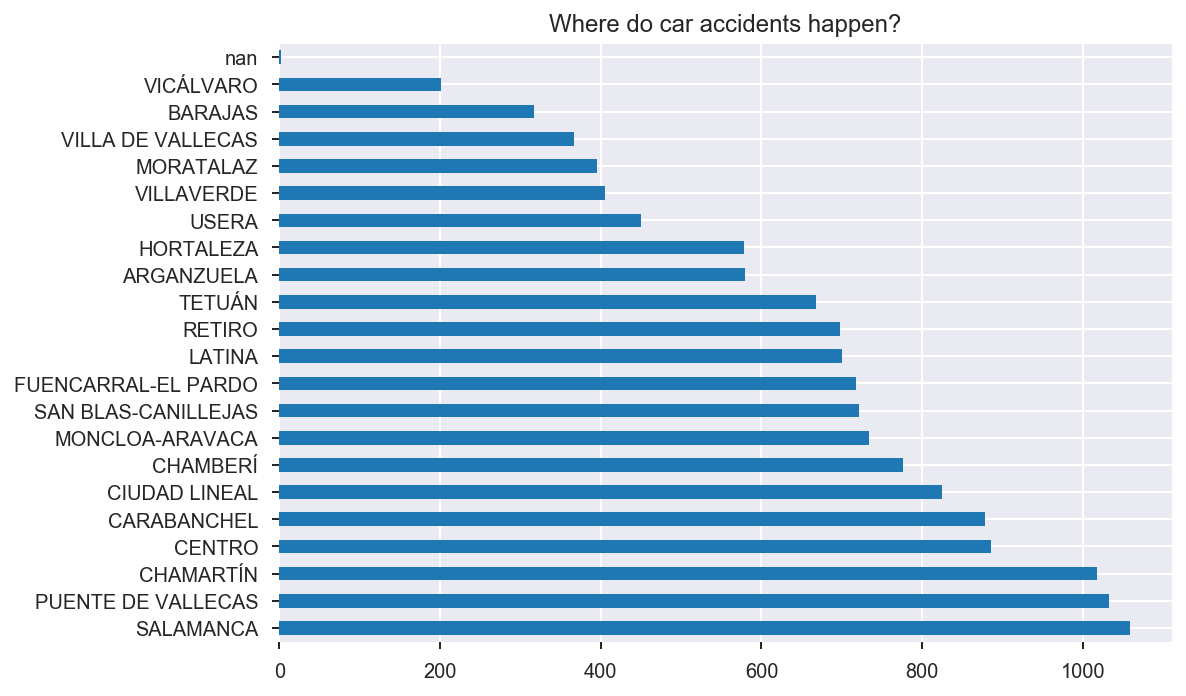

In [7]:
#fig, ax = plt.subplots(2, 1, sharex='col', sharey='row', figsize=(7,10))

#df['DISTRITO'].value_counts(dropna=False).plot.barh(ax=ax[0])
df_reduced['DISTRITO'].value_counts(dropna=False).plot.barh(title="Where do car accidents happen?")

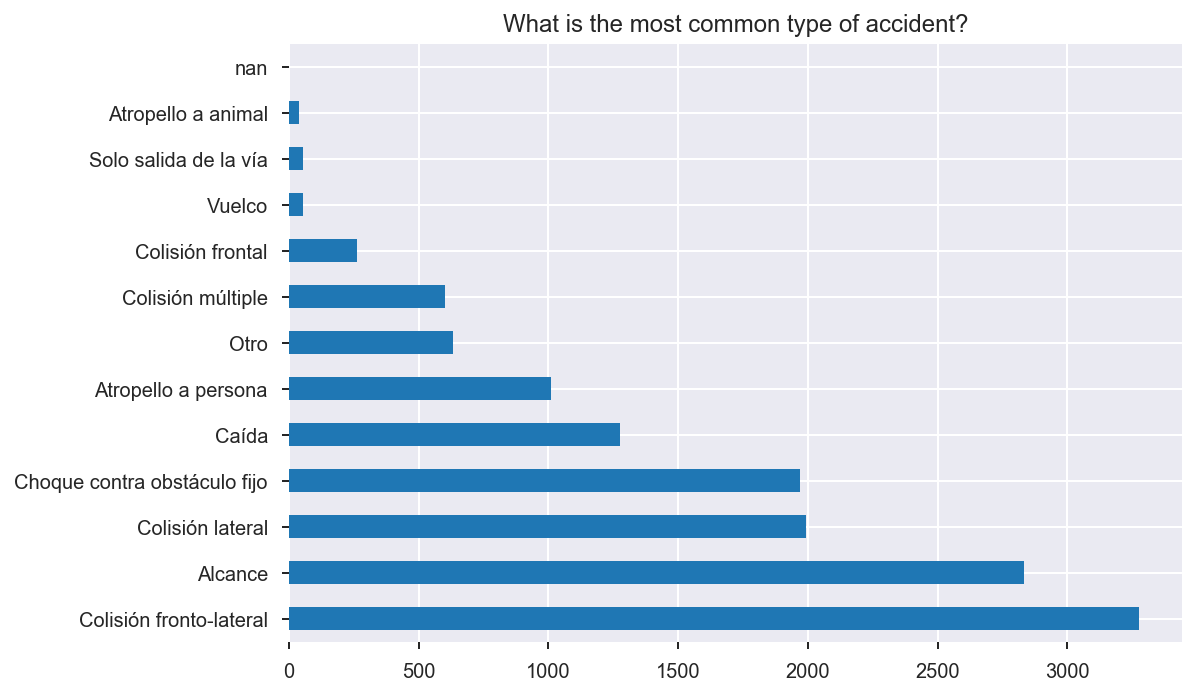

In [8]:
df_reduced['TIPO ACCIDENTE'].value_counts(dropna=False).plot.barh(title="What is the most common type of accident?")

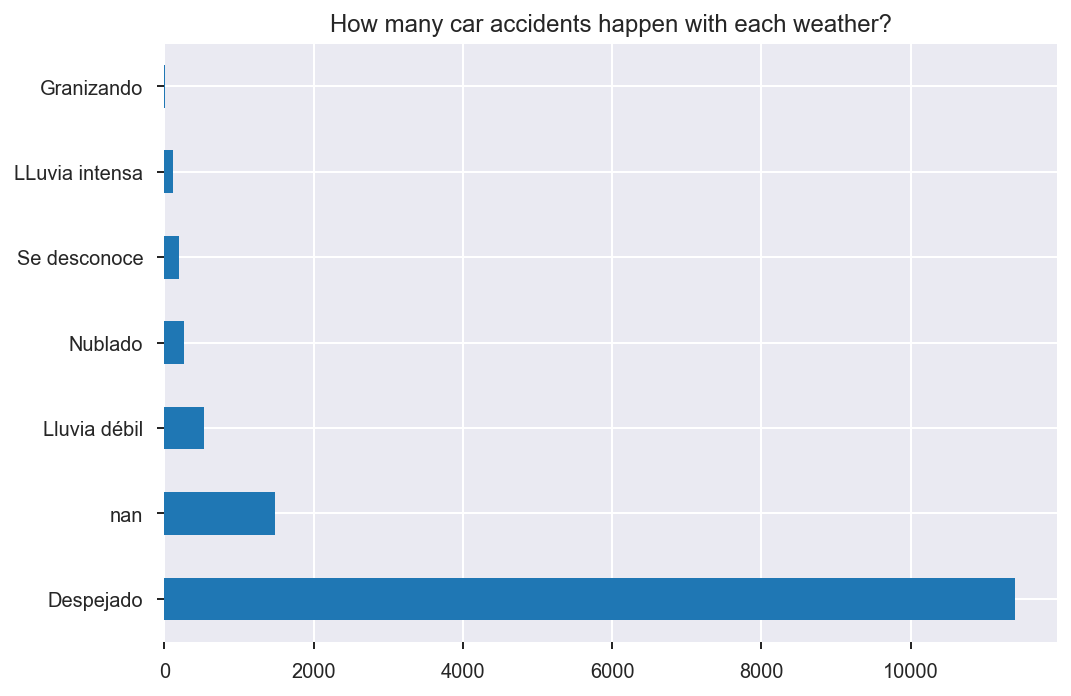

In [9]:
df_reduced['ESTADO METEREOLÓGICO'].value_counts(dropna=False).plot.barh(title="How many car accidents happen with each weather?")

It looks, very interesting that most of the accidents have been on sunny days. Maybe most of the days are sunny in Madrid?

In [10]:
# ToDo: Calculate the number of sunny days in this data

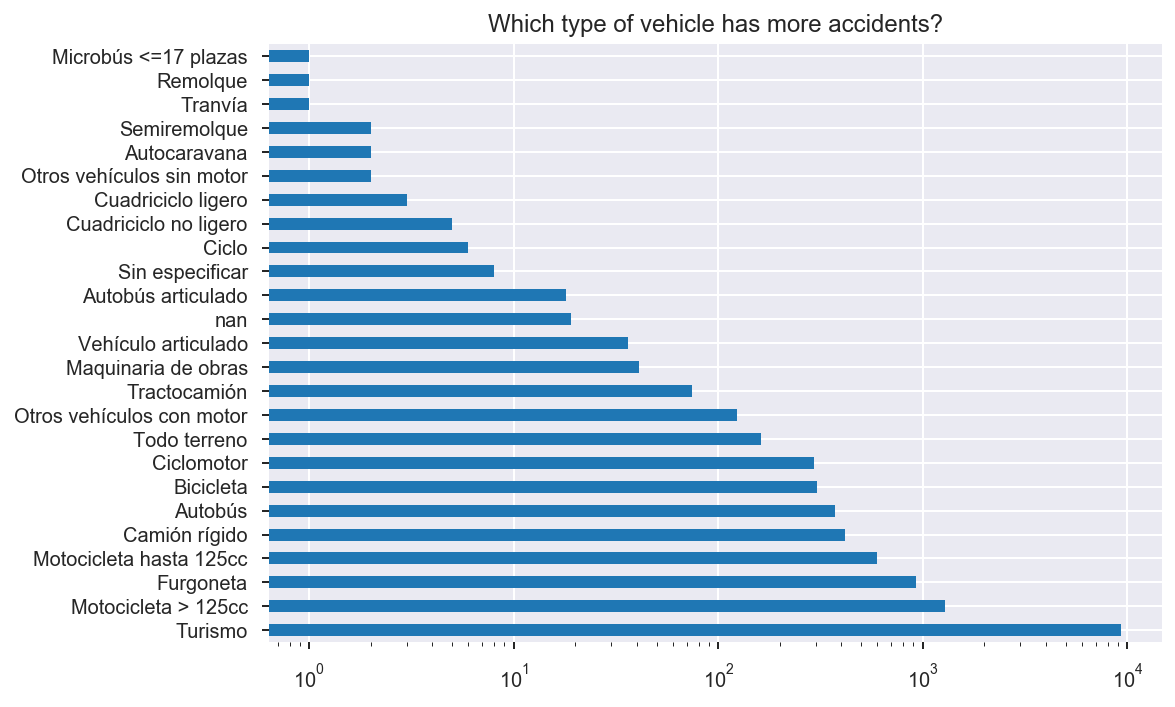

In [11]:
df_reduced['TIPO VEHÍCULO'].value_counts(dropna=False).plot.barh(logx=True, title="Which type of vehicle has more accidents?")

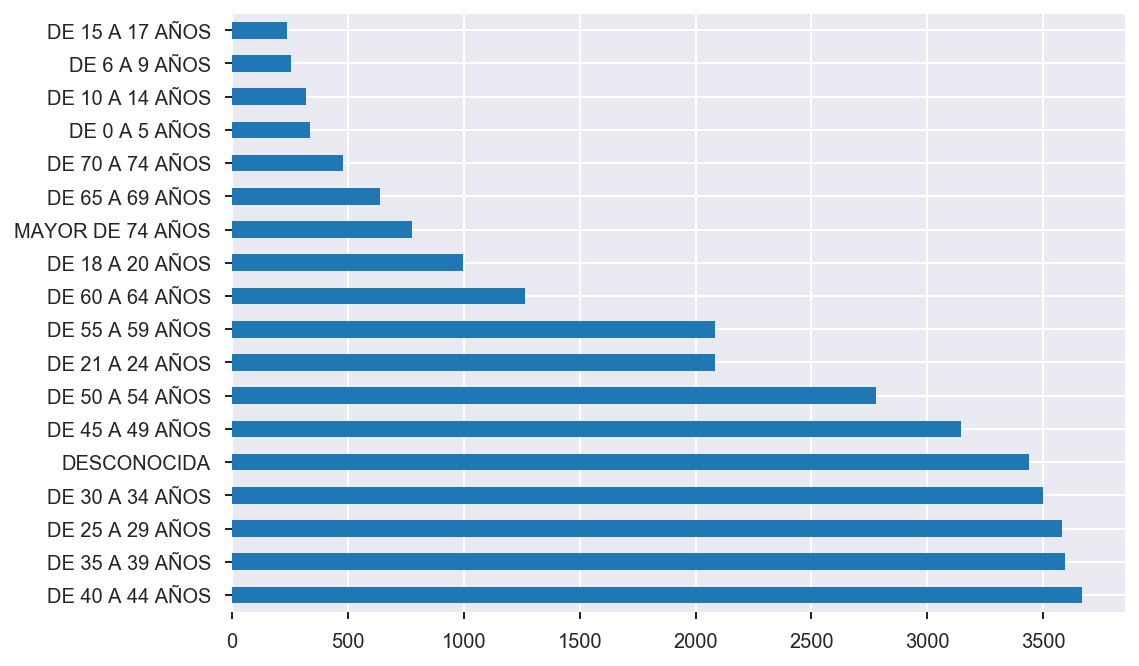

In [12]:
df['RANGO DE EDAD'].value_counts(dropna=False).plot.barh()
# ToDo: sort the list

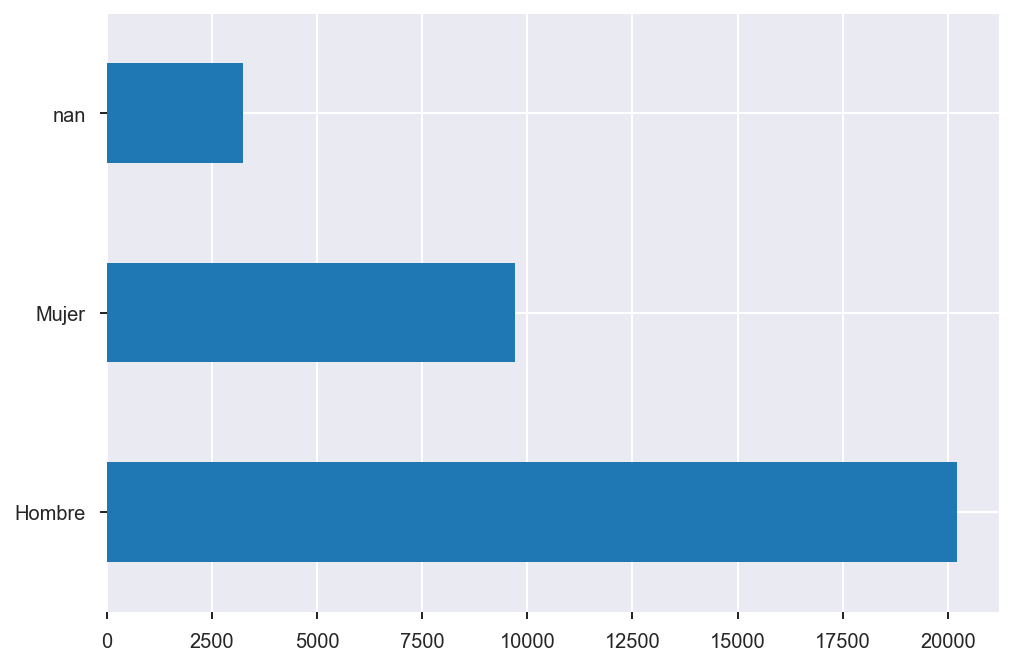

In [13]:
df['SEXO'].value_counts(dropna=False).plot.barh()

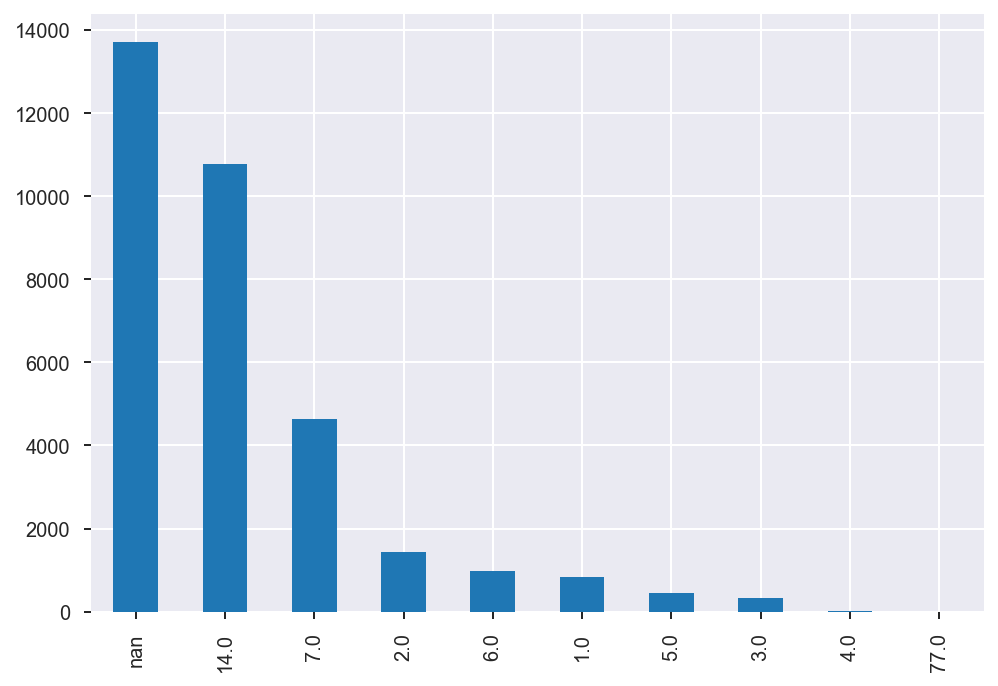

In [14]:
df['LESIVIDAD*'].value_counts(dropna=False).plot(kind='bar')

01 Atención en urgencias sin posterior ingreso. - LEVE 

02 Ingreso inferior o igual a 24 horas - LEVE

03 Ingreso superior a 24 horas. - GRAVE

04 Fallecido 24 horas - FALLECIDO

05 Asistencia sanitaria ambulatoria con posterioridad - LEVE

06 Asistencia sanitaria inmediata en centro de salud o mutua - LEVE

07 Asistencia sanitaria sólo en el lugar del accidente - LEVE

14 Sin asistencia sanitaria

77 Se desconoce

nan Sin asistencia sanitaria


## Bar plots with two features

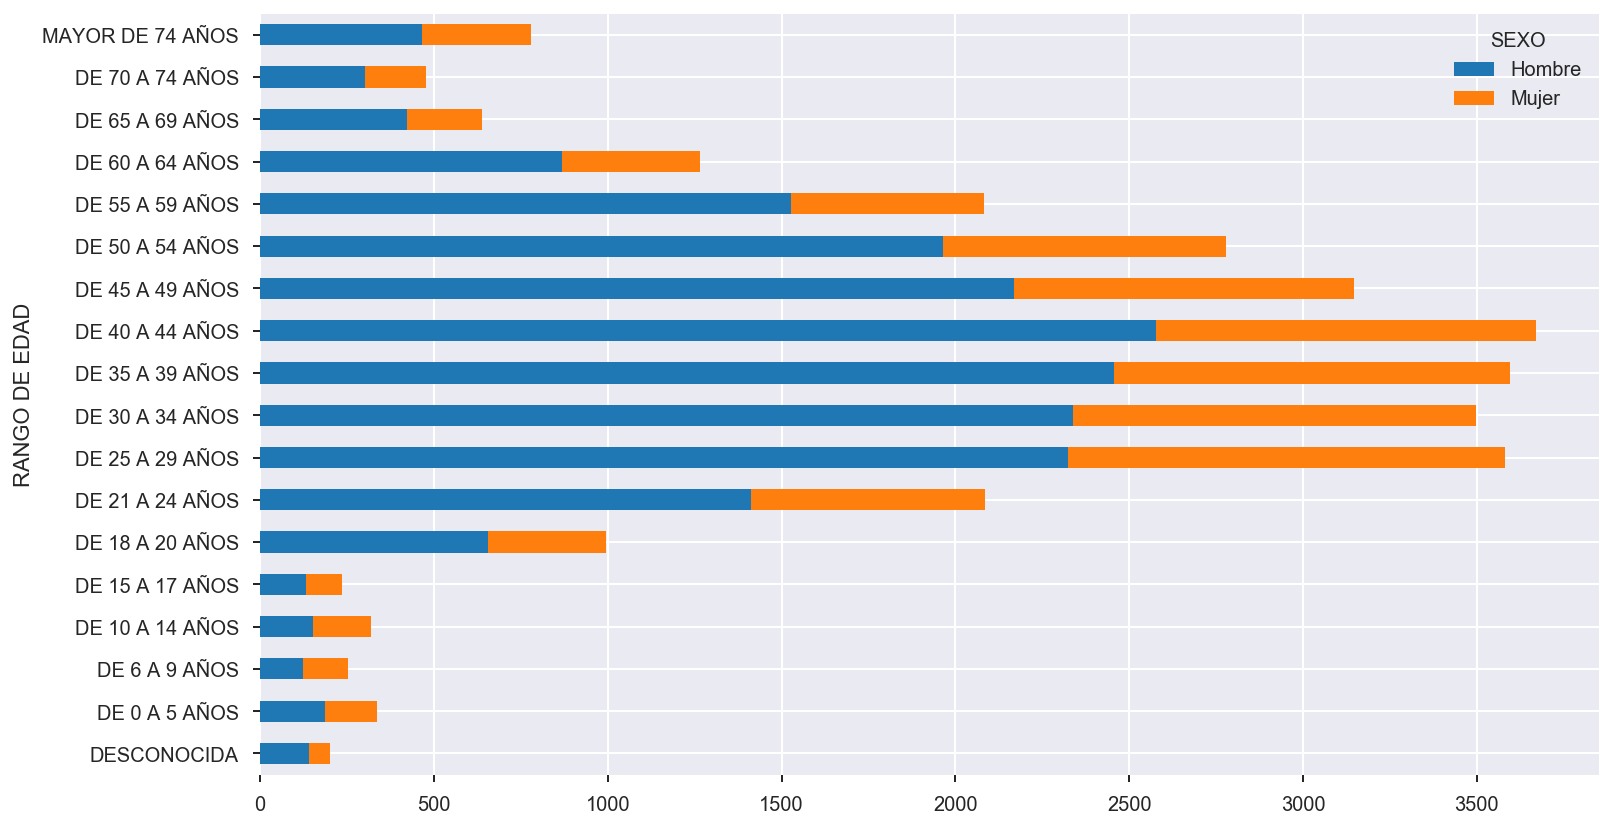

In [116]:
df_edad_sexo = df.groupby(["SEXO", 'RANGO DE EDAD']).size().reset_index().pivot(columns='SEXO', index='RANGO DE EDAD', values=0)

df_edad_sexo = df_edad_sexo.reindex(['DESCONOCIDA','DE 0 A 5 AÑOS','DE 6 A 9 AÑOS','DE 10 A 14 AÑOS','DE 15 A 17 AÑOS', 'DE 18 A 20 AÑOS','DE 21 A 24 AÑOS', 'DE 25 A 29 AÑOS', 'DE 30 A 34 AÑOS', 'DE 35 A 39 AÑOS', 'DE 40 A 44 AÑOS', 'DE 45 A 49 AÑOS', 'DE 50 A 54 AÑOS', 'DE 55 A 59 AÑOS', 'DE 60 A 64 AÑOS', 'DE 65 A 69 AÑOS', 'DE 70 A 74 AÑOS', 'MAYOR DE 74 AÑOS'])
df_edad_sexo.plot(kind='barh', stacked=True, figsize=(12,7))


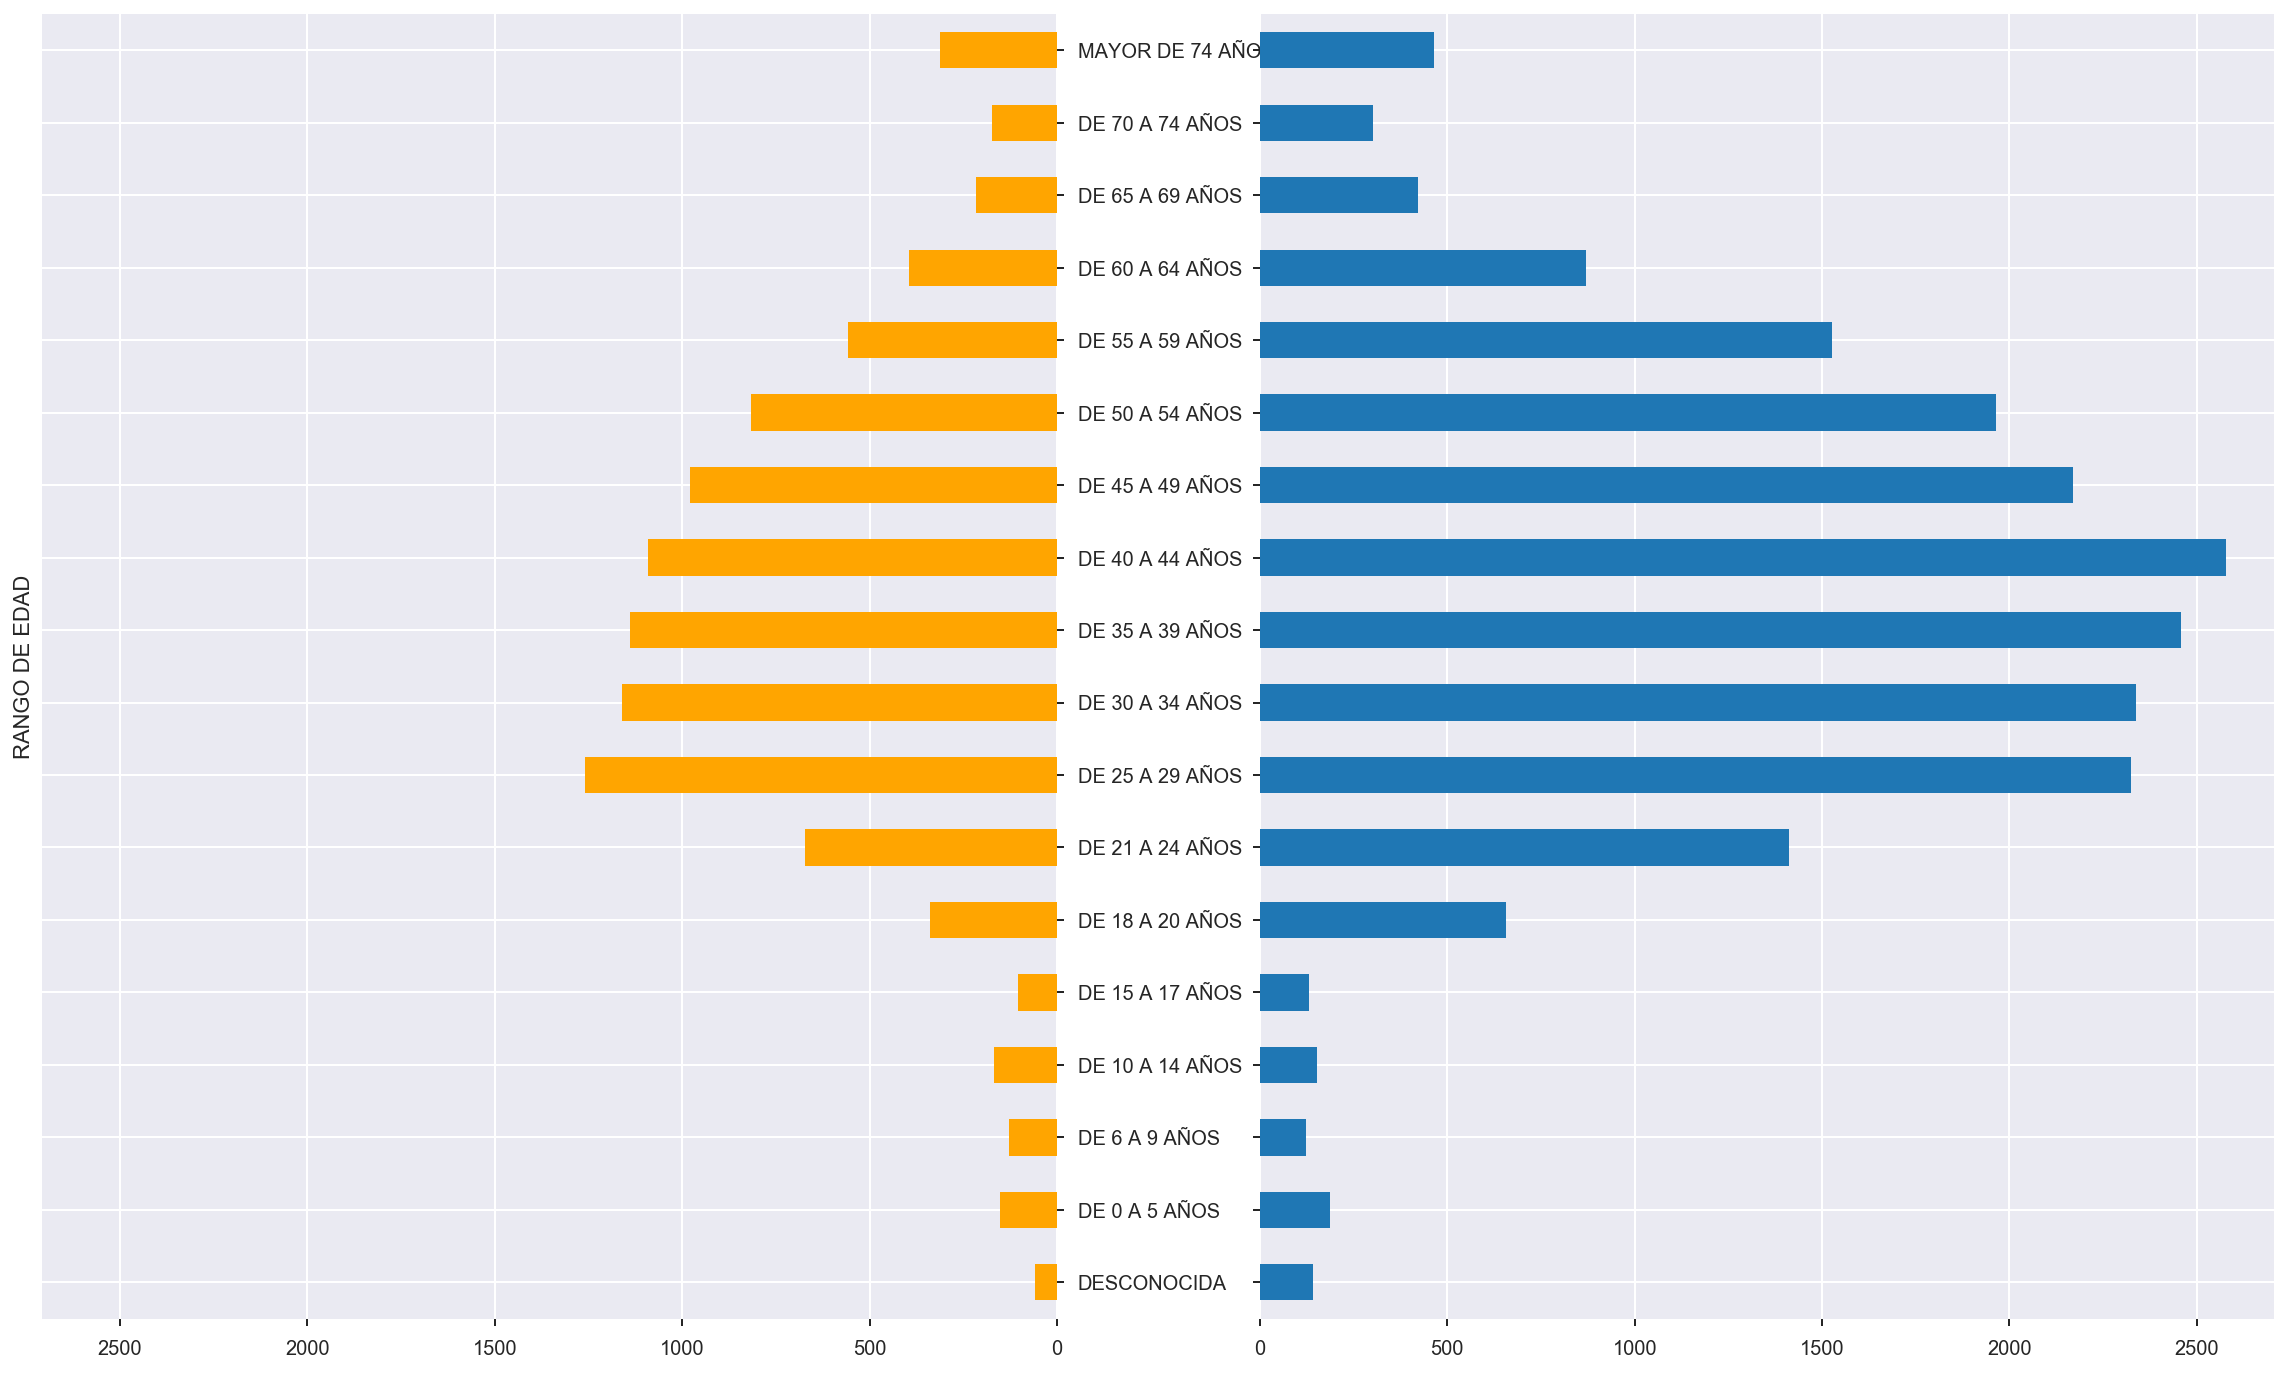

In [245]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20,12))
  
df_edad_sexo["Mujer"].plot(kind='barh', x='SEXO', legend=False, ax=ax, color='orange')
df_edad_sexo["Hombre"].plot(kind='barh', x='SEXO', ax=ax2)

# Set same axis
if ax.get_xlim()[1] > ax2.get_xlim()[1]:
    ax2.set_xlim([0, ax.get_xlim()[1]])
else:
    ax.set_xlim([0, ax2.get_xlim()[1]])

ax.yaxis.tick_right() # Move yticks to the center
ax.invert_xaxis()     # Rotate first figure


In [ ]:
# ToDo: Añadir conductores y leyenda

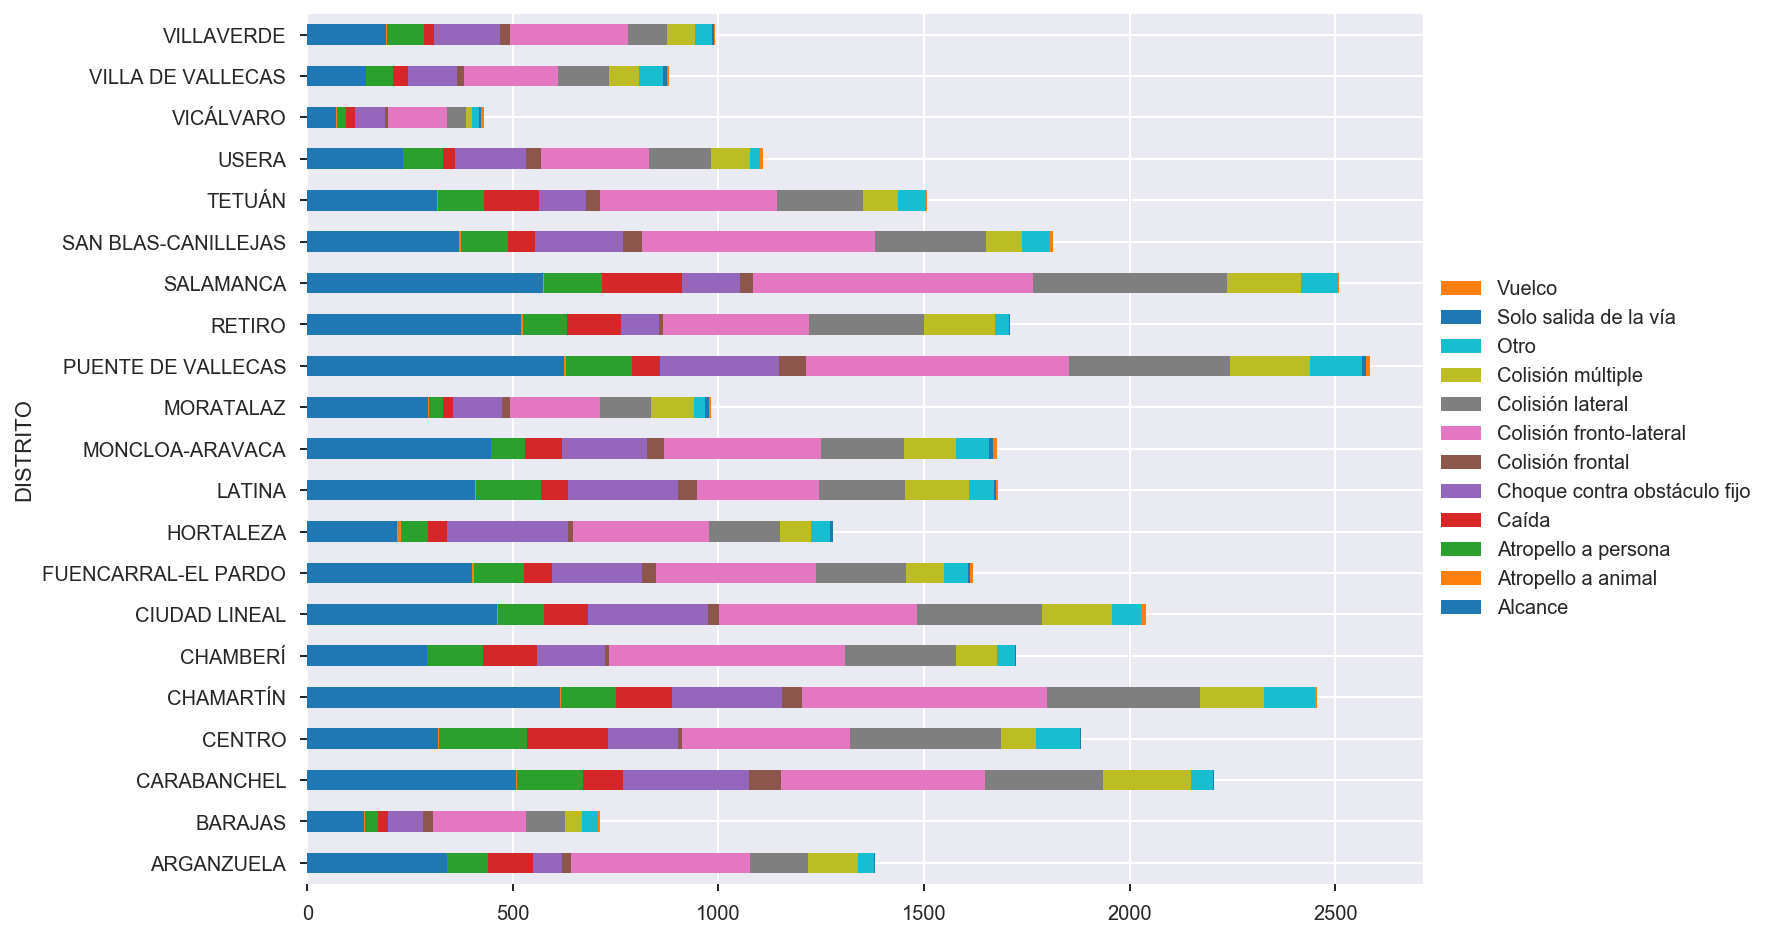

In [117]:
df_accid_dist = df.groupby(["TIPO ACCIDENTE", 'DISTRITO']).size().reset_index().pivot(columns='TIPO ACCIDENTE', index='DISTRITO', values=0)
df_accid_dist.plot(kind='barh', stacked=True, legend=False, figsize=(10,8))
 
# Legend
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))
